# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview



In [1]:
# The purpose
# of the data is to explore the link between the various socio-economic factors and crime# import all the important packages

# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn, because of excellent heatmaps
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
# can also use sklearn for our regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools


In [2]:
train = pandas.read_csv('communities_train.csv')
val = pandas.read_csv('communities_val.csv')
test = pandas.read_csv('communities_test.csv')
train.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.01,0.33,0.00,0.94,0.21,0.11,0.26,0.37,0.22,0.74,...,0.44,0.73,0.90,0.73,0.85,0.01,0.45,0.47,0.0,0.06
1,0.01,0.09,0.02,0.89,0.23,0.13,0.07,0.71,0.27,0.15,...,0.24,0.37,0.25,0.46,0.34,0.00,1.00,0.06,0.0,0.22
2,0.01,0.53,0.02,0.92,0.21,0.03,0.98,1.00,1.00,0.20,...,0.17,0.32,0.13,0.04,0.18,0.01,0.32,0.01,0.0,0.07
3,0.01,0.36,0.00,0.98,0.02,0.00,0.42,0.45,0.29,0.53,...,0.01,0.81,0.50,0.65,0.76,0.04,0.11,0.00,0.0,0.07
4,0.01,0.68,0.01,0.98,0.04,0.01,0.71,0.60,0.62,0.39,...,0.10,0.71,0.67,0.73,0.55,0.08,0.06,0.07,0.0,0.03


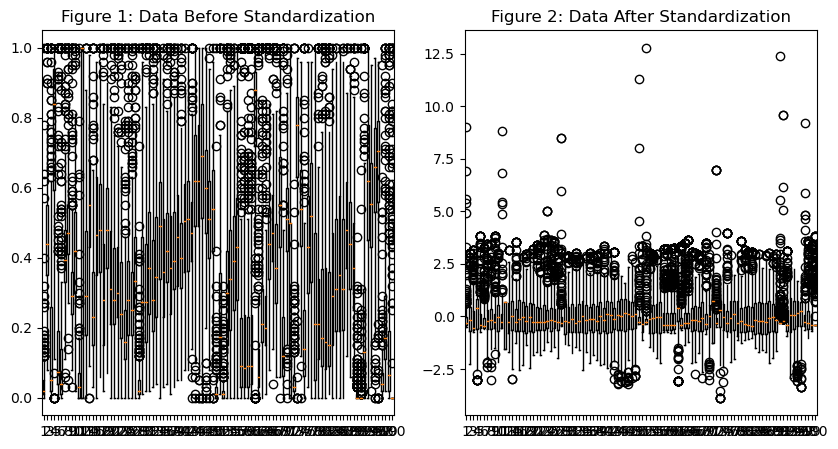

In [3]:
from sklearn.preprocessing import StandardScaler
# separate the target variable
last_column_name = train.columns[-1]
target_train = train[last_column_name]
train = train.drop(last_column_name, axis=1)

# standardize the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

# plot the data before and after standardization
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(train)
axs[0].set_title('Figure 1: Data Before Standardization')
axs[1].boxplot(train_scaled)
axs[1].set_title('Figure 2: Data After Standardization')
plt.show()


In [4]:
print('num train = {}'.format(train.shape[0]))
print('val train = {}'.format(val.shape[0]))
print('test train = {}'.format(test.shape[0]))

num train = 298
val train = 298
test train = 299


In [5]:
train = pandas.read_csv('communities_train.csv')
val = pandas.read_csv('communities_val.csv')
test = pandas.read_csv('communities_test.csv')
train.head()

# Defining variables

X_bom = []
for column in train.columns.values:
    X_bom.append(column)
X_bom.remove(' ViolentCrimesPerPop ')

# print(X_bom)
# print(len(X_bom)) # 100

X_bcc = []

# The ViolentCrimesPerPop data 

X_variables_linear = X_bom + X_bcc
Y_variable = ' ViolentCrimesPerPop '

Y_train = np.array(train[Y_variable], dtype=float)
X_train = np.array(train[X_variables_linear], dtype=float)
# want to add a constant to the model (the y-axis intercept)
X_train_constant = sm.add_constant(X_train)
# also creating validation data
Y_val = np.array(val[Y_variable], dtype=float)
X_val = np.array(val[X_variables_linear], dtype=float)
X_val_constant = sm.add_constant(X_val)
# will create our test data as well, we will need it later on
Y_test = np.array(test[Y_variable], dtype=float)
X_test = np.array(test[X_variables_linear], dtype=float)

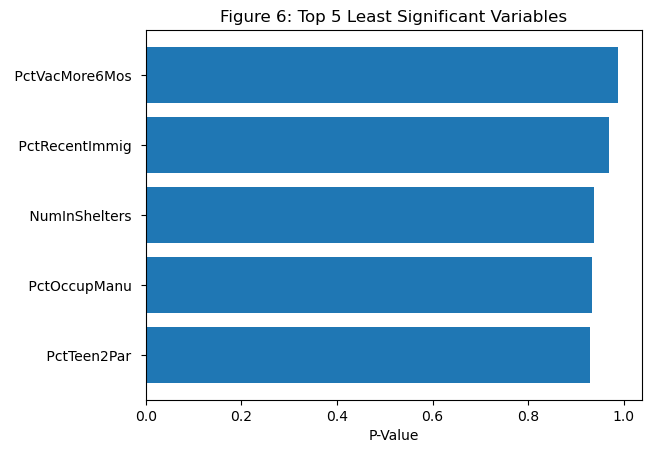

Top 5 Least Significant Variables:
 PctTeen2Par 
 PctOccupManu 
 NumInShelters 
 PctRecentImmig 
 PctVacMore6Mos 


In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the linear regression model
model = sm.OLS(Y_train, X_train_constant).fit()

# Get the p-values for each variable
p_values = model.pvalues[1:]

# Sort the variables by p-value
sorted_idx = p_values.argsort()

# Get the top 5 least significant variables
top_5 = sorted_idx[-5:]

# Get the names of the variables
variable_names = np.array(X_variables_linear)[top_5]

# Create a bar chart of the p-values
plt.barh(variable_names, p_values[top_5])
plt.xlabel('P-Value')
plt.title('Figure 6: Top 5 Least Significant Variables')
plt.show()

print("Top 5 Least Significant Variables:")
for name in variable_names:
    print(name)



Linear Model Validation Data: RMSE = 0.15491210066258207
Linear Model Training Data: RMSE = 0.10419990101033948
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     6.207
Date:                Wed, 24 May 2023   Prob (F-statistic):           7.72e-28
Time:                        12:53:15   Log-Likelihood:                 251.07
No. Observations:                 298   AIC:                            -300.1
Df Residuals:                     197   BIC:                             73.27
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

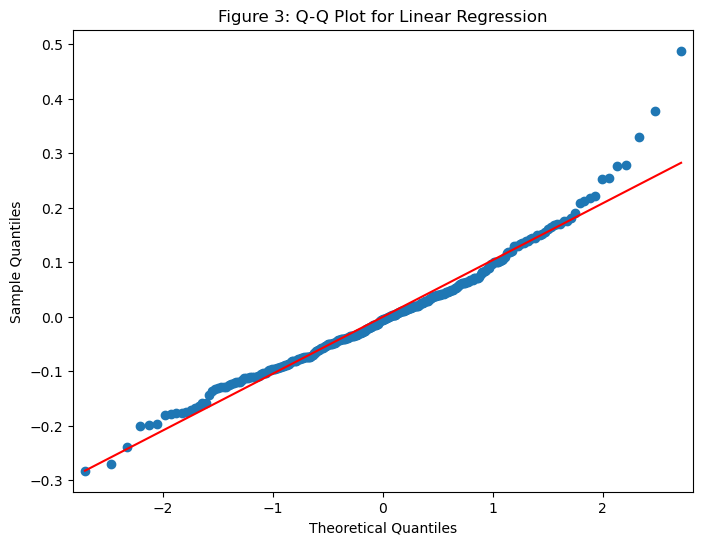

In [7]:
# create the linear model
model = sm.OLS(Y_train, X_train_constant)
# fit the model without any regularisation
model_1_fit = model.fit()
pred = model_1_fit.predict(X_val_constant)
pred_train = model_1_fit.predict(X_train_constant)
print('Linear Model Validation Data: RMSE = {}'.format(
  np.sqrt(mean_squared_error(Y_val, pred))))
print('Linear Model Training Data: RMSE = {}'.format(
  np.sqrt(mean_squared_error(Y_train, pred_train))))
print(model_1_fit.summary())
print(model_1_fit.params)
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(model_1_fit.resid, ax=ax, line='s')
plt.title('Figure 3: Q-Q Plot for Linear Regression')
plt.show()

In [8]:
# def plot_rmses(lambdas, rmse_train, rmse_validation):
#     fig = plt.figure(figsize=[20, 8])
#     ax = fig.add_subplot(2, 1, 1)
#     ax.plot(lambdas, rmse_train, label='Training RMSE')
#     ax.plot(lambdas, rmse_validation, label='Validation RMSE')
#     ax.legend();
#     ax = fig.add_subplot(2, 1, 2)
#     ax.plot(lambdas[1:], rmse_train[1:], label='Training RMSE')
#     ax.plot(lambdas[1:], rmse_validation[1:], label='Validation RMSE')
#     ax.legend()

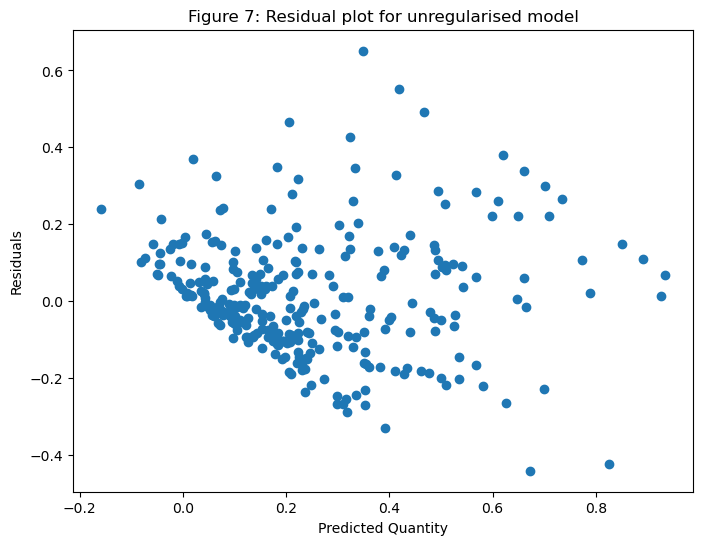

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(pred, Y_val - pred)
plt.title('Figure 7: Residual plot for unregularised model')
plt.xlabel('Predicted Quantity')
plt.ylabel('Residuals')
plt.show()

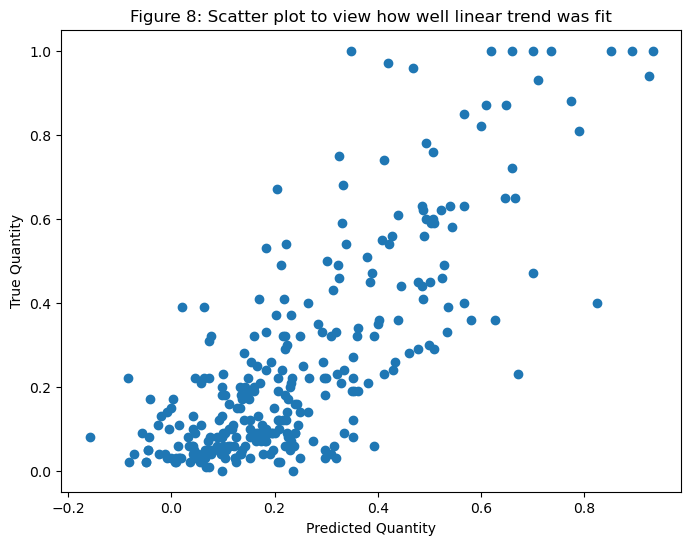

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(pred, Y_val)
plt.title('Figure 8: Scatter plot to view how well linear trend was fit')
plt.xlabel('Predicted Quantity')
plt.ylabel('True Quantity')
plt.show()

In [11]:
# # Ridge regression because of the L2_wt=1.0
# lambdas = np.arange(0.0, 0.01, 0.001)
# rmse_train = []
# rmse_validation = []
# coeffs = []
# for l in lambdas:
#     trained_model_poly_ridge = sm.OLS(Y_train, X_train).fit_regularized(alpha=l, L1_wt=0.0, L2_wt=1.0)
#     coeffs.append(trained_model_poly_ridge.params)
#     rmse_train.append(np.sqrt(np.mean((trained_model_poly_ridge.predict(X_train) - Y_train)**2)))
#     rmse_validation.append(np.sqrt(np.mean((trained_model_poly_ridge.predict(X_val) - Y_val)**2)))
    
# plot_rmses(lambdas, rmse_train, rmse_validation)
# best_lambda_index = np.argmin(rmse_validation)
# best_lambda = lambdas[best_lambda_index]
# print("Best lambda:", best_lambda)
# plt.title('Ridge Regression - Lambda vs RMSE')
# plt.show()
# print("RMSE at best lambda:", rmse_validation[best_lambda_index])


In [12]:
# # Lasso egression because of the L1_wt=1.0
# lambdas = np.arange(0.0, 0.00001, 0.000001)
# rmse_train = []
# rmse_validation = []
# coeffs = []
# for l in lambdas:
#     trained_model_poly_lasso = sm.OLS(Y_train, X_train).fit_regularized(alpha=l, L1_wt=1.0)
#     coeffs.append(trained_model_poly_lasso.params)
#     rmse_train.append(np.sqrt(np.mean((trained_model_poly_lasso.predict(X_train) - Y_train)**2)))
#     rmse_validation.append(np.sqrt(np.mean((trained_model_poly_lasso.predict(X_val) - Y_val)**2)))
    
# plot_rmses(lambdas, rmse_train, rmse_validation)
# best_lambda_index = np.argmin(rmse_validation)
# best_lambda = lambdas[best_lambda_index]
# print("Best lambda:", best_lambda)
# print("RMSE at best lambda:", rmse_validation[best_lambda_index])

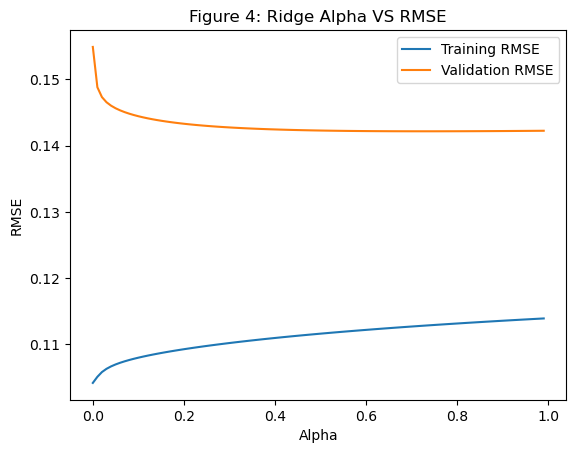

Best alpha: 0.73
Train RMSE at best alpha: 0.11285489391549011
Val RMSE at best alpha: 0.14217904217029403
R-squared at best alpha: 0.6806839430033069
Adjusted R-squared at best alpha: 0.5185945739694525


In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create a list of alpha values
alphas = np.arange(0, 1, 0.01)

# Initialize lists to store the RMSEs and R-squared scores
rmse_train = []
rmse_validation = []
r2_train = []
r2_validation = []
adj_r2_validation = []

# Loop over the alpha values and fit a Ridge regression model for each
for alpha in alphas:
    # Fit the Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)

    # Calculate the RMSE on the training set
    y_pred_train = model.predict(X_train)
    rmse_train.append(np.sqrt(np.mean((y_pred_train - Y_train)**2)))
    r2_train.append(r2_score(Y_train, y_pred_train))

    # Calculate the RMSE on the validation set
    y_pred_val = model.predict(X_val)
    rmse_validation.append(np.sqrt(np.mean((y_pred_val - Y_val)**2)))
    r2_validation.append(r2_score(Y_val, y_pred_val))
    
    # Calculate the adjusted R-squared on the validation set
    n = len(Y_val)
    p = X_val.shape[1]
    adj_r2_val = 1 - ((1 - r2_validation[-1]) * (n - 1) / (n - p - 1))
    adj_r2_validation.append(adj_r2_val)
    
# Plot the RMSEs
plt.plot(alphas, rmse_train, label='Training RMSE')
plt.plot(alphas, rmse_validation, label='Validation RMSE')
plt.legend()
plt.title('Figure 4: Ridge Alpha VS RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

# # Plot the R-squared scores
# plt.plot(alphas, r2_train, label='Training R-squared')
# plt.plot(alphas, r2_validation, label='Validation R-squared')
# plt.legend()
# plt.title('Figure 4: Ridge Alpha VS R-squared')
# plt.xlabel('Alpha')
# plt.ylabel('R-squared')
# plt.show()

# Find the best alpha value and the corresponding RMSE, R-squared, and adjusted R-squared on the validation set
best_alpha_index = np.argmin(rmse_validation)
best_alpha = alphas[best_alpha_index]
best_tra_rmse = rmse_train[best_alpha_index]
best_val_rmse = rmse_validation[best_alpha_index]
best_r2 = r2_validation[best_alpha_index]
best_adj_r2 = adj_r2_validation[best_alpha_index]
print("Best alpha:", best_alpha)
print("Train RMSE at best alpha:", best_tra_rmse)
print("Val RMSE at best alpha:", best_val_rmse)
print("R-squared at best alpha:", best_r2)
print("Adjusted R-squared at best alpha:", best_adj_r2)
# print(alphas, rmse_train)
# print(alphas, rmse_validation)


/tmp/ipykernel_379/1459343480.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+00, tolerance: 1.343e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/s

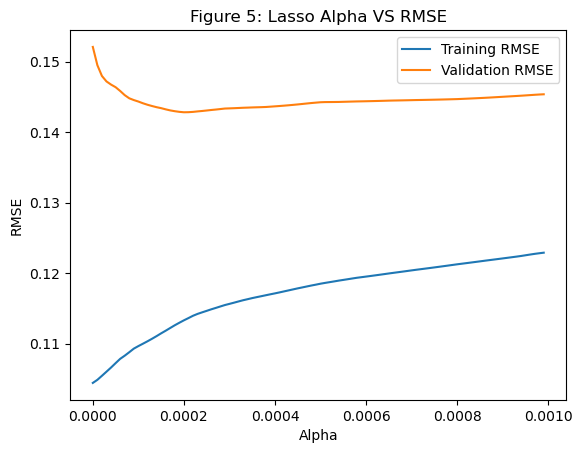

Best alpha: 0.0002
Train RMSE at best alpha: 0.11331758865133405
Val RMSE at best alpha: 0.14281997772431038
R-squared at best alpha: 0.6777985344192463
Adjusted R-squared at best alpha: 0.5142444909772395


In [14]:
from sklearn.linear_model import Lasso

# Create a list of alpha values
alphas = np.arange(0, 0.001, 0.00001)

# Initialize lists to store the RMSEs and R-squared values
rmse_train = []
rmse_validation = []
r2_train = []
r2_validation = []
adj_r2_validation = []

# Loop over the alpha values and fit a Lasso regression model for each
for alpha in alphas:
    # Fit the Lasso regression model
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)

    # Calculate the RMSE on the training set
    y_pred_train = model.predict(X_train)
    rmse_train.append(np.sqrt(np.mean((y_pred_train - Y_train)**2)))
    r2_train.append(model.score(X_train, Y_train))

    # Calculate the RMSE on the validation set
    y_pred_val = model.predict(X_val)
    rmse_validation.append(np.sqrt(np.mean((y_pred_val - Y_val)**2)))
    r2_validation.append(model.score(X_val, Y_val))
    
    adj_r2_val = 1 - ((1 - r2_validation[-1]) * (n - 1) / (n - p - 1))
    adj_r2_validation.append(adj_r2_val)

# Plot the RMSEs
plt.plot(alphas, rmse_train, label='Training RMSE')
plt.plot(alphas, rmse_validation, label='Validation RMSE')
plt.legend()
plt.title('Figure 5: Lasso Alpha VS RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

# # Plot the R-squared values
# plt.plot(alphas, r2_train, label='Training R-squared')
# plt.plot(alphas, r2_validation, label='Validation R-squared')
# plt.legend()
# plt.title('Figure 5: Lasso Alpha VS R-squared')
# plt.xlabel('Alpha')
# plt.ylabel('R-squared')
# plt.show()

# Find the best alpha value and the corresponding RMSE, R-squared, and adjusted R-squared on the validation set
best_alpha_index = np.argmin(rmse_validation)
best_alpha = alphas[best_alpha_index]
best_tra_rmse = rmse_train[best_alpha_index]
best_val_rmse = rmse_validation[best_alpha_index]
best_r2 = r2_validation[best_alpha_index]
best_adj_r2 = adj_r2_validation[best_alpha_index]
print("Best alpha:", best_alpha)
print("Train RMSE at best alpha:", best_tra_rmse)
print("Val RMSE at best alpha:", best_val_rmse)
print("R-squared at best alpha:", best_r2)
print("Adjusted R-squared at best alpha:", best_adj_r2)
# print(alphas, rmse_train)
# print(alphas, rmse_validation)
# print(alphas, r2_train)
# print(alphas, r2_validation)
